# Lecture 19 - The Perceptron continued; Hard-margin Support Vector Machine (SVM)

# The Perceptron

A basic model for a neuron consists of the following: 

* A set of *synapses* each of which is characterized by a *weight* (which includes a *bias*).

* An *adder*.

* An *activation function* (e.g. linear function)

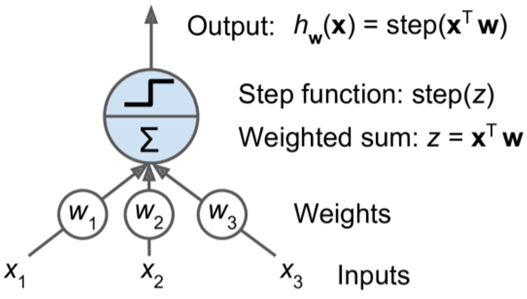

In [1]:
from IPython.display import Image
Image('figures/perceptron.png', width=400)

We can write this mathematically as: 

$$y = \phi\left(v\right)$$

where 

$$v =  \sum_{j=1}^m w_j x_j + b = \mathbf{w}^T\mathbf{x} + b$$

and $\phi(x) = \begin{cases}1, & x\geq 0\\ 0, & x<0\end{cases}$
    
* *What does this look like graphically?*

Consider an alternative **error function** known as the **perceptron criterion**. To derive this, we note that we are seeking a weight vector $\mathbf{w}$ such that patterns $x_i$ in class $C_1$ will have $\mathbf{w}^Tx_i + b > 0$, whereas the patterns $x_i$ in class $C_2$ have $\mathbf{w}^Tx_i + b < 0$. Using the $t\in \{-1,1\}$ target coding scheme it follows that we would like all patterns to satisfy

$$(\mathbf{w}^Tx_i + b)t_i > 0$$

* The perceptron criterion associates zero error with any pattern that is correctly classified, whereas for a misclassified pattern $x_i$ it tries to minimize the quantity $-(\mathbf{w}^Tx_i + b)t_i$.

* The perceptron criterion is therefore given by:

$$E_p(\mathbf{w},b) = - \sum_{n\in\mathcal{M}} (\mathbf{w}^T \mathbf{x}_n + b) t_n$$

where $\mathcal{M}$ denotes the set of all misclassified patterns.

* We now apply the **stochastic gradient descent** algorithm to this error function. The change in the weight vector $\mathbf{w}$ is then given by:

\begin{eqnarray}
\mathbf{w}^{(t+1)} &\leftarrow & \mathbf{w}^{(t)} - \eta \frac{\partial E_p(\mathbf{w},b)}{\partial \mathbf{w}} = \mathbf{w}^{(t)} + \eta \mathbf{x}_n t_n\\
b^{(t+1)} &\leftarrow & b^{(t)} - \eta\frac{\partial E_p(\mathbf{w},b)}{\partial b} = b^{(t)} + \eta t_n
\end{eqnarray}

where $\eta$ is the **learning rate** parameter and $t$ is an integer that indexes the iteration steps of the algorithm. 

* Note that, as the weight vector evolves during training, the set of patterns that are misclassified will change.

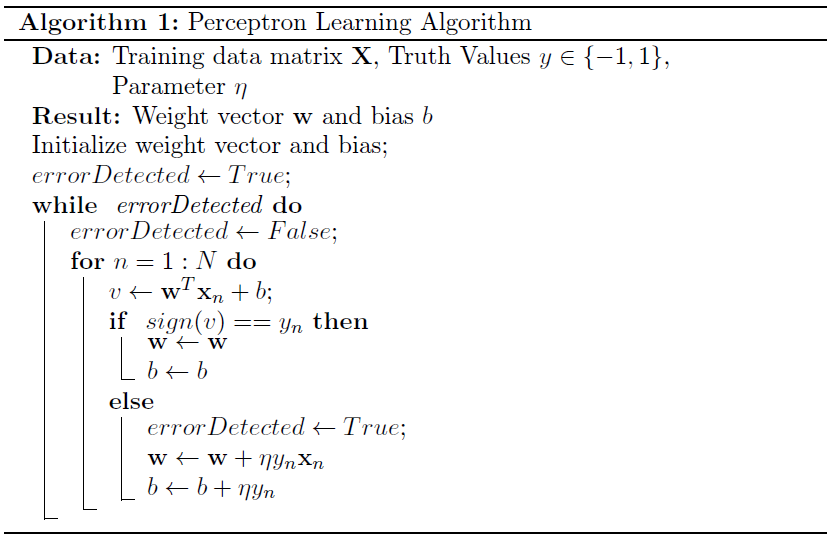

In [2]:
Image('figures/PerceptronLearning.png', width=700)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
def generateMVNRandData(Npts, mu, sigma):
    '''This function generates random Gaussian data'''
    data  = np.random.multivariate_normal(mu, sigma*np.eye(len(mu)), Npts)
    return data

def plotLine(weights, interval):
    '''This function plots the discriminant function given its weight values.'''
    x = np.array(interval)
    y = -(weights[0]/weights[1])-(weights[2]/weights[1])*x
    plt.plot(x,y)

def perceptronLearningAlg(data,labels,eta,nEpochs):
    '''This function implements the Perceptron Learning 
    algorithm on a given training data.'''
    nPts = data.shape[0]
    weights = np.random.rand(data.shape[1])
    print('Initial weights:', weights)
    
    error = 1
    epo = 0
    while(error > 0 and epo < nEpochs):
        error = 0
        epo += 1
        for i in range(nPts):
            v =  data[i,:]@weights
            if np.sign(v) != labels[i]:
                weights += eta*data[i,:]*labels[i]
                error += 1
                plt.scatter(data[:,1],data[:,2], c=labels, linewidth=0)
                plotLine(weights, [-3,3]);
                plt.pause(0.5)
    
    print('Final weights:', weights)
    return weights

Initial weights: [0.57873552 0.45445374 0.89368855]


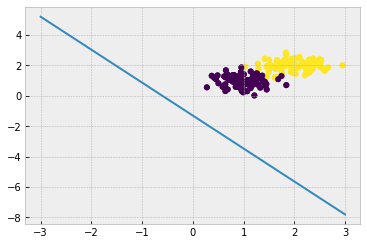

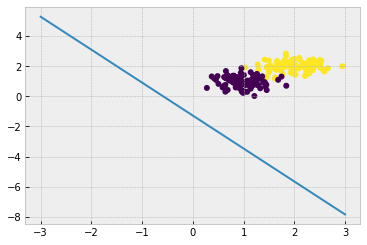

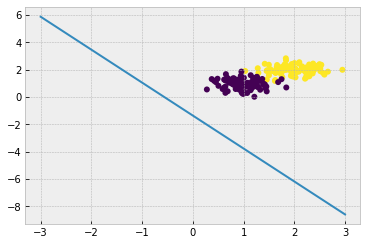

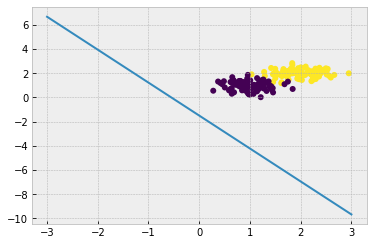

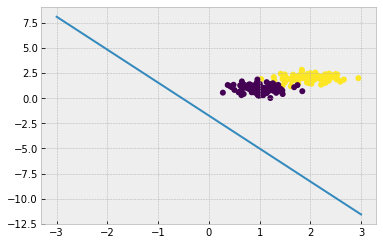

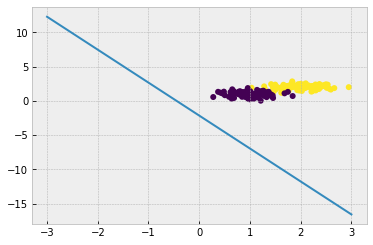

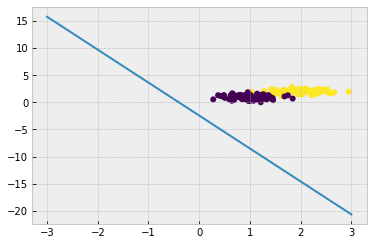

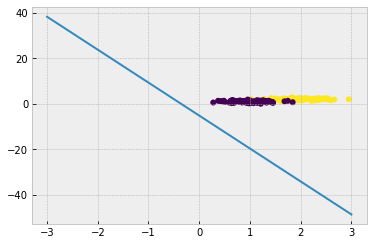

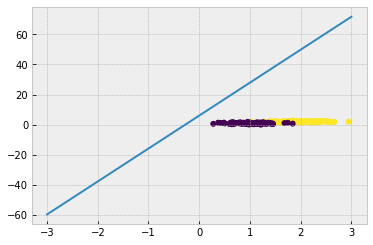

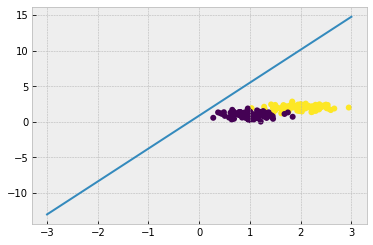

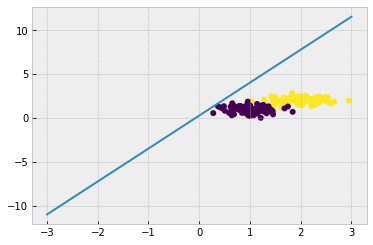

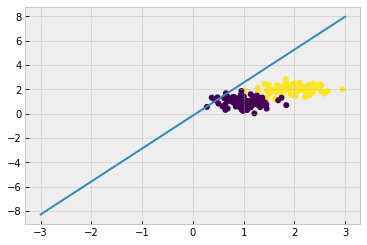

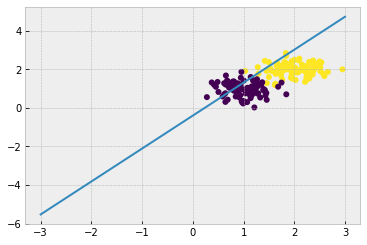

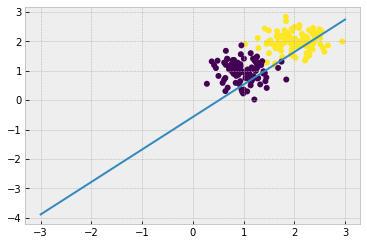

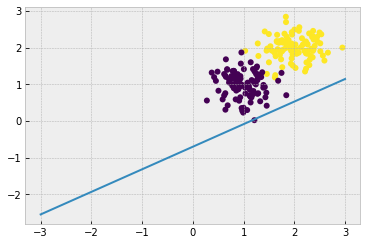

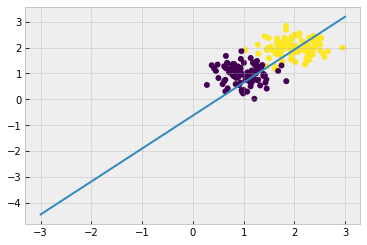

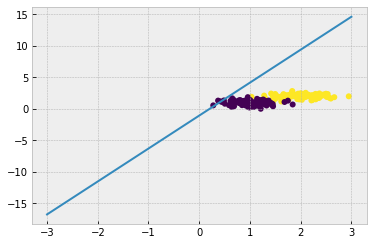

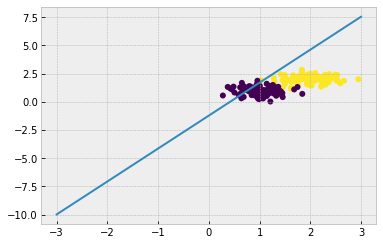

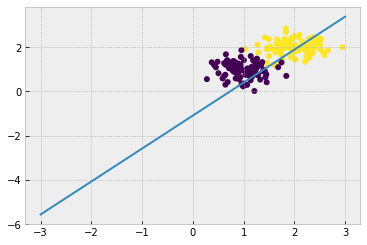

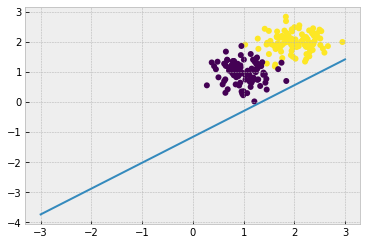

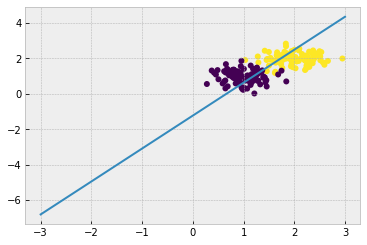

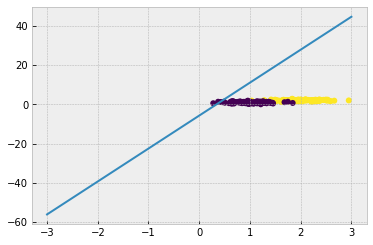

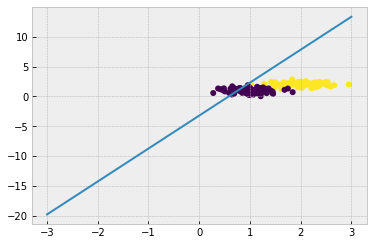

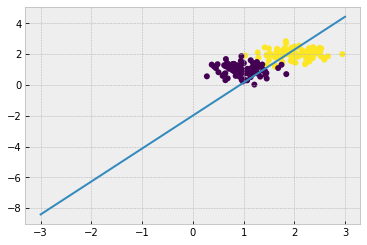

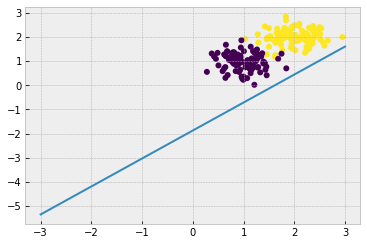

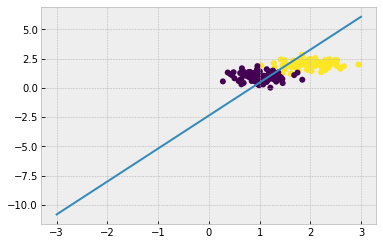

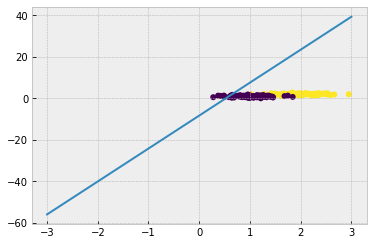

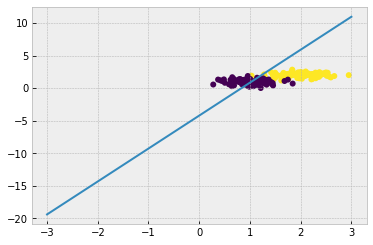

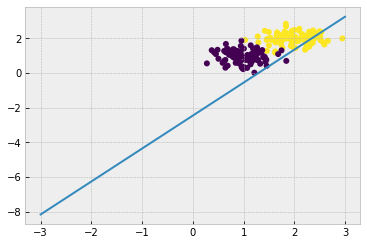

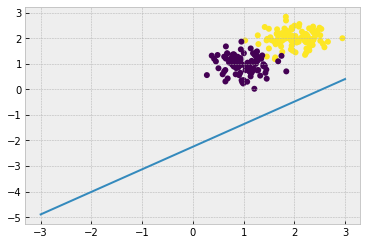

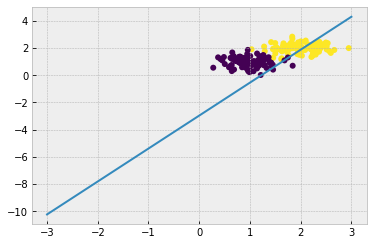

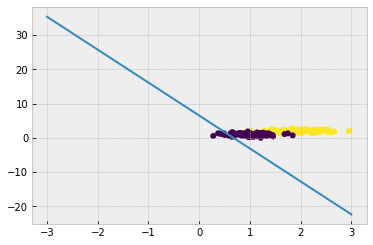

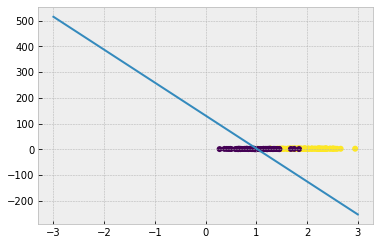

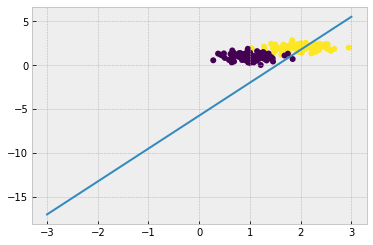

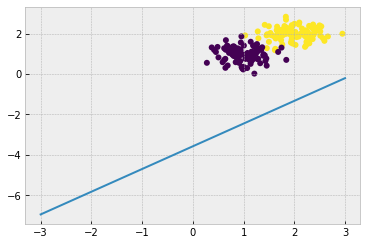

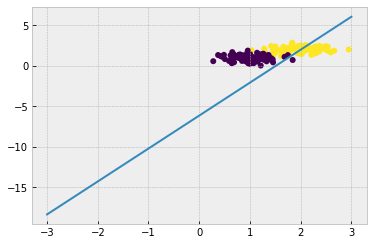

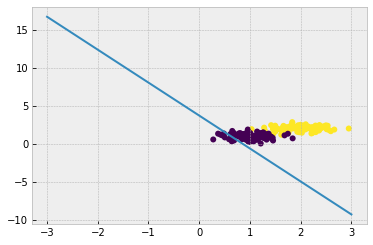

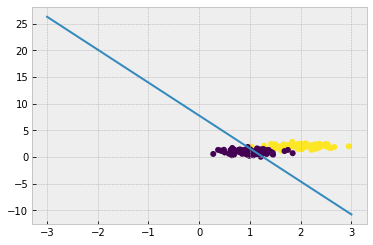

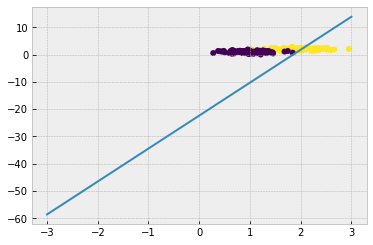

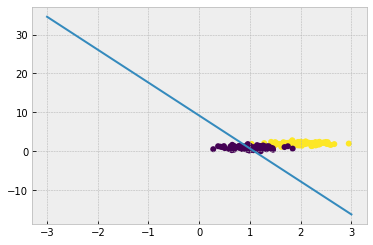

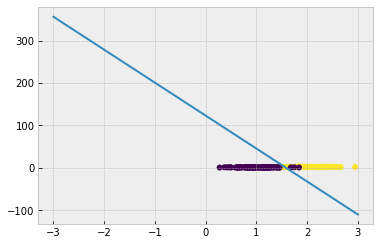

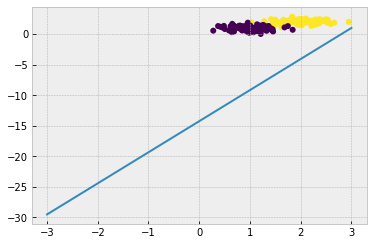

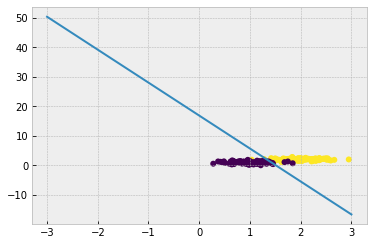

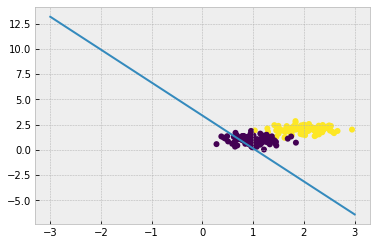

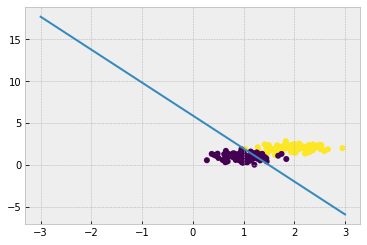

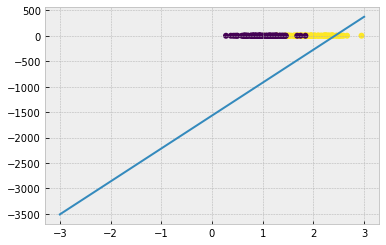

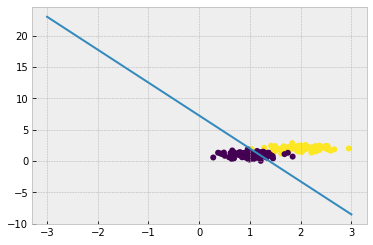

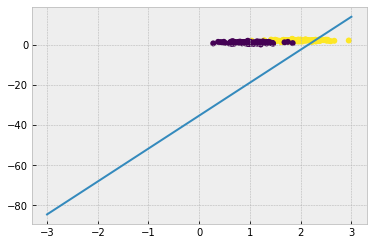

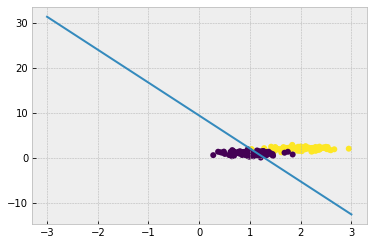

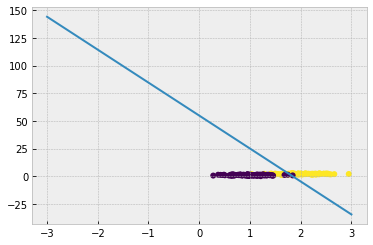

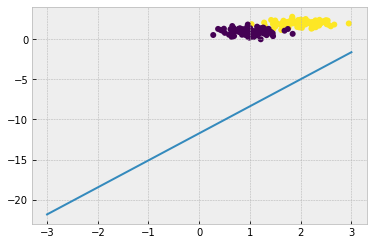

Final weights: [-0.47126448 -0.04018859  0.13577056]


In [6]:
Npts  = 100
mu1   = [2,2]
mu2   = [1,1]
var   = .1
eta   = 0.05 # learning rate
nEpochs = 10;

data1 = np.array(generateMVNRandData(Npts, mu1, var))
data1 = np.hstack((np.ones((Npts,1)),data1))

data2 = np.array(generateMVNRandData(Npts, mu2, var))
data2 = np.hstack((np.ones((Npts,1)),data2))

data  = np.vstack((data1, data2))
labels= np.hstack((np.ones(Npts), -np.ones(Npts)))

plt.scatter(data[:,1],data[:,2], c=labels, linewidth=0)

perceptronLearningAlg(data,labels,eta,nEpochs);

## Perceptron Convergence Theorem

The *Perceptron convergence theorem* states that for any data set which is **linearly separable** the perceptron learning algorithm is **guaranteed to find *a* solution** in a finite number of steps.

* In other words, the Perceptron learning rule is guaranteed to converge to a weight vector that correctly classifies the examples provided the training examples are linearly separable.

---

# Exercise

1. Consider a neuron with two inputs and one output and a step function. If two weights are $w_1=1$ and $w_2 =1$, and the bias is $b=-1.5$, then what is the output for inputs $(0,0)$, $(1,0)$, $(0,1)$, and $(1,1)$?

2. How does the learning behavior change with changes in $\eta$? as $\eta$ increases? as $\eta$ decreases?

3. How would you generate overlapping classes using the provided code? Explain your answer. (Only change parameters. You do not need to change code.)

4. What happens to the learning behavior when you have overlapping classes?

5. The implementation provided uses $\{-1,1\}$ labels. Suppose we want to use labels $\{0,1\}$. How can we formulate the Perceptron Learning? How does the code need to change to account for this difference (i.e., suppose you want to use $\{0,1\}$ labels. What would you need to change in the code?) Why?

6. In the provided code, there is not a separate line for learning the bias $b$ as in the pseudo-code above. How is it being estimated and represented it in the code? (... the code *is* still learning the bias value).

---

# Kernel Machine

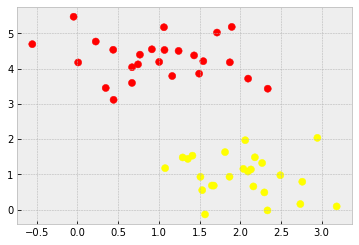

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw them as follows:

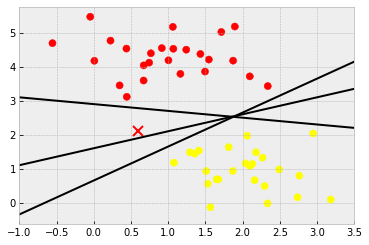

In [8]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.

# Kernel Machine

Consider the following data set:

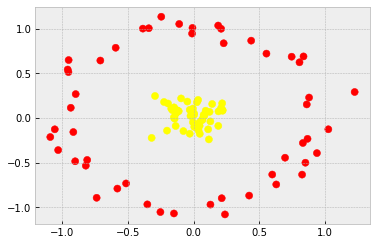

In [9]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

The two classes are clearly not linearly separable. What would you do?

In [10]:
r = np.exp(-((X - X.mean(axis=0))** 2/(2*X.std(axis=0, ddof=1)**2)).sum(axis=1))

<IPython.core.display.Javascript object>


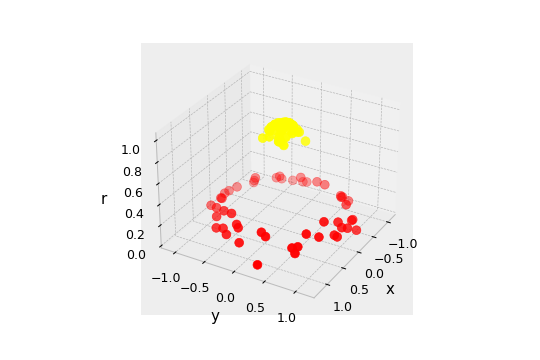

In [11]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

%matplotlib notebook
plot_3D();

## Support Vector Machines: Maximizing the Margin

SVMs offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look:

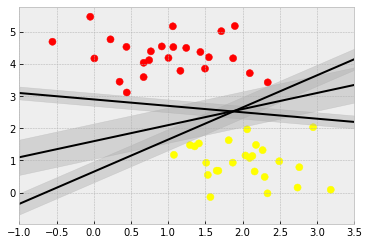

In [12]:
%matplotlib inline
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. Support vector machines are an example of such a maximum margin estimator.

# Support Vector Machine: Separable Classes

Let's start with the two-class linearly separable task and then we will extend the method to more general cases where data are not separable. Let $\phi(x_i)$, $i=1,2,\dots,N$, be the feature vectors of the training set, $X$, and corresponding target values $t_1, t_2, \cdots, t_N$ where $t_n\in\{-1,1\}$. These belong to either of two classes, $C_1$, $C_2$, which are *assumed to be linearly separable*.

The goal, once more, is to design a hyperplane

$$y(x) = w^T\phi(x) + b = 0$$

that classifies correctly all the training vectors.

Because the training data is linearly separable in the feature space, by definition there exists at least one choice of the parameters $w$ and $b$ such that $y(x)$ satisfies $y(x_n)>0$ for points having $t_n = +1$ and $y(x_n)<0$ for points having $t_n = -1$, so that $t_ny(x_n) > 0$ for all training data points.

Such a hyperplane is not unique. The perceptron algorithm may converge to any one of the possible solutions. Having gained in experience, this time we will be more demanding. 

* Which hyperplane would any sensible engineer choose as the classifier for operation in practice, where data outside the training set will be fed to it? 

* Once again, the hyperplane that leaves more “room” on either side, so that data in both classes can move a bit more freely, with less risk of causing an error. 

* A sensible choice for the hyperplane classifier would be the one that leaves the maximum margin from both classes.

* Thus such a hyperplane can be trusted more, when it is faced with the challenge of operating with unknown data.
    * It has a higher generalizarion performance.

## Quantifying the "Margin"

Let us now quantify the term "margin" that a hyperplane leaves from both classes. Every hyperplane is characterized by its direction (determined by $w$) and its exact position in space (determined by $b$). Since we want to give no preference to either of the classes, then it is reasonable for each direction to select that hyperplane which has the same distance from the respective nearest points in $c_1$ and $c_2$.

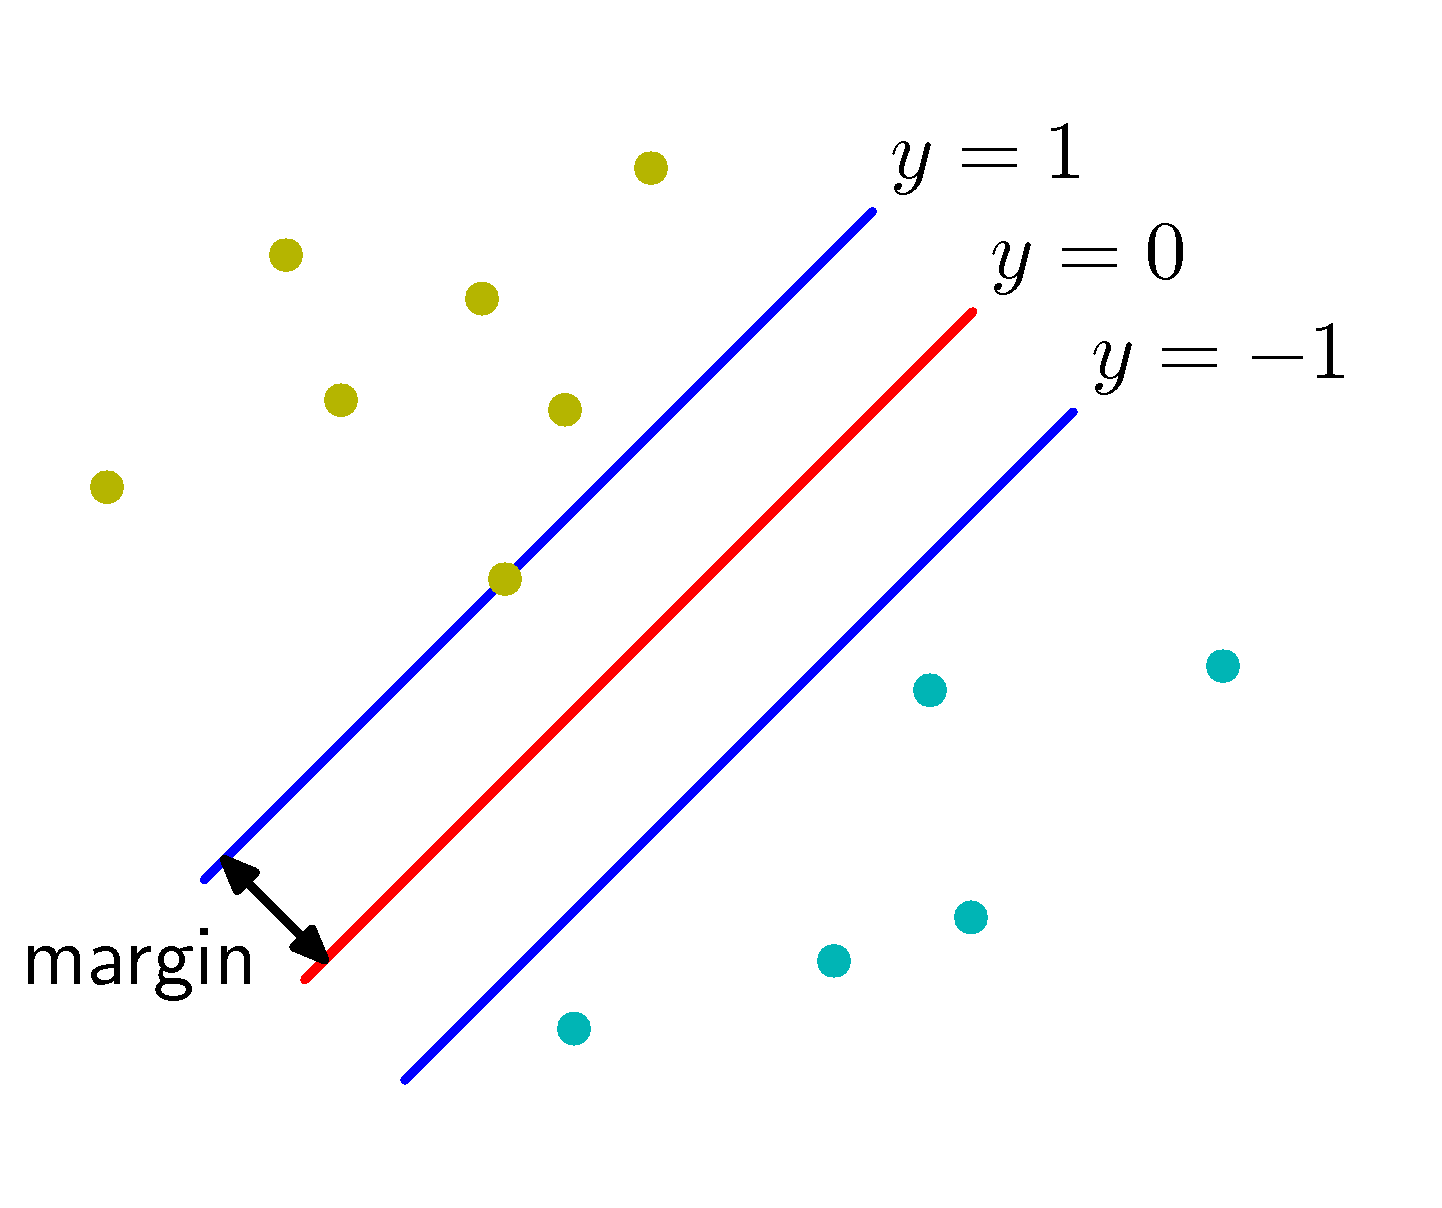

In [3]:
Image('figures/Figure7.1a.png', width=400)
#Source: Bishop textbook

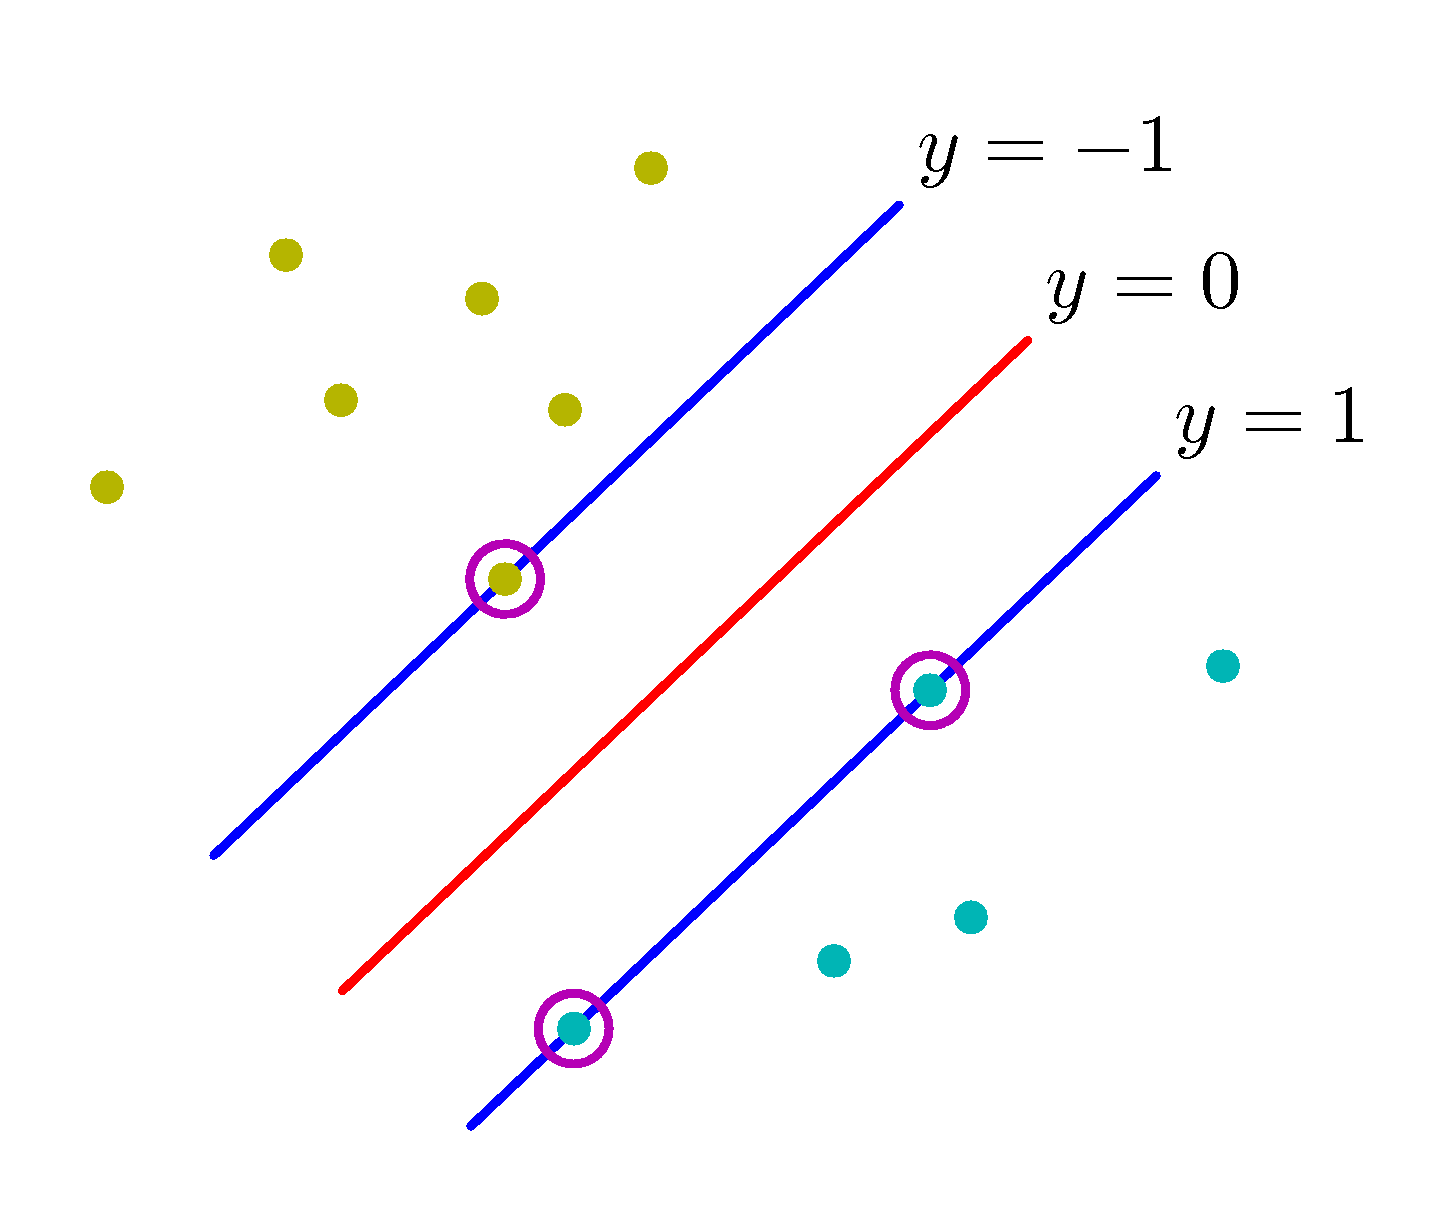

In [4]:
Image('figures/Figure7.1b.png', width=400)
#Source: Bishop textbook

Recall that the perpendicular distance of a point $x$ from a hyperplane defined by $y(x) = 0$ where $y(x)$ takes the form $y(x) = w^T\phi(x)+b$ is given by $\frac{|y(x)|}{\Vert w\Vert}$.


Furthermore, we are only interested in solutions for which all data points are correctly classified, so that $t_n y(x_n) > 0, \forall n$. Thus the distance of a point $x_n$ to the decision surface is given by

$$\frac{t_n y(x_n)}{\Vert w\Vert} = \frac{t_n \left(w^t\phi(x_n) + b\right)}{\Vert w\Vert}$$

to be continued...

---